In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
X = list(range(1, 21))
Y = []
for i in range(1, 21):
    if i <= 10:
        Y.append(4*i + 6)
    else:
        Y.append(6*i + 6)
X = np.array(X)
Y = np.array(Y)
Y = Y + np.random.normal(20)
X1 = X[0:10]
X2 = X[10:20]
Y1 = Y[0:10]
Y2 = Y[10:20]

In [3]:
def linReg(x, y):
    One = np.array([np.ones(len(x))]).T
    A = np.hstack((One, np.array([x]).T))
    B = np.array([y]).T
    return np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), B).T[0]

In [4]:
def plotLine(M, color = "r"):
    x = list(range(1, 21))
    y = []
    m = M[1]
    c = M[0]
    for i in range(1, 21):
        y.append(m*i + c)
    plt.plot(x, y, color = color)

In [5]:
R = linReg(X, Y)
R

array([15.07589648,  6.57894737])

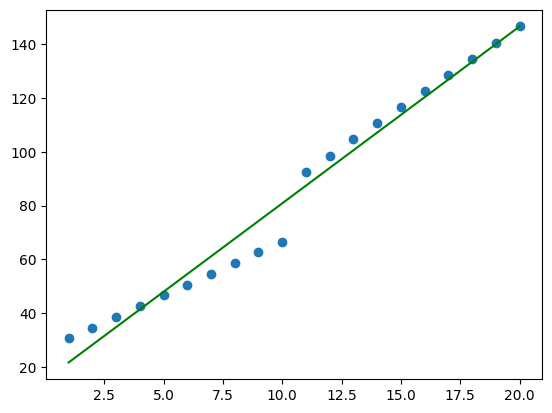

In [6]:
plotLine(R, "g")
plt.scatter(X, Y)
plt.show()

# Trying to do Gradient Descent
Take X1 and X2, Y1 and Y2.
### Loss Function - $\Sigma (Y_1 - mX_1 - c)^2 +  (X_2 - \frac{(Y_2 - c)}{m})^2$
## $\frac{\partial L}{\partial c} = \Sigma -2 (Y_1 - mX_1 - c) + \frac{2}{m} (X_2 - \frac{(Y_2 - c)}{m})$
## $\frac{\partial L}{\partial m} = \Sigma -2X_1 (Y_1 - mX_1 - c) + 2(\frac{Y_2 - c}{m^2}) (X_2 - \frac{(Y_2 - c)}{m})$

In [7]:
def del_m(X1, X2, Y1, Y2, m, c):
    return sum(-2 * X1 * (Y1 - m*X1 - c)) + 2*sum((Y2 - c)/(m**2) * (X2 - (Y2 - c)/m))

In [8]:
def del_c(X1, X2, Y1, Y2, m, c):
    return sum(-2 * (Y1 - m*X1 - c)) + 2/m * sum(X2 - (Y2 - c)/m)

In [9]:
np.concatenate((X1, X2))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [10]:
def swapReg(X1, X2, Y1, Y2, lr = 1e-2, eps = 1e-2, epochs = 1e5, init_m = 6, init_c = -5):
    m_i = init_m
    c_i = init_c
    for i in range(0, int(epochs)):
        grad_m = del_m(X1, X2, Y1, Y2, m_i, c_i)
        grad_c = del_c(X1, X2, Y1, Y2, m_i, c_i)
#        print(grad_m)
#        print(grad_c)
#        print()
        m_i = m_i - lr * grad_m
        c_i = c_i - lr * grad_c
        if ((grad_m**2 + grad_c**2)**0.5 < eps):
            return [c_i, m_i]
    print("Epochs done.")
    return [c_i, m_i]

In [11]:
SR = swapReg(X1, X2, Y1, Y2, lr = 1e-3, eps = 1e-3, init_m = R[1], init_c = R[0])

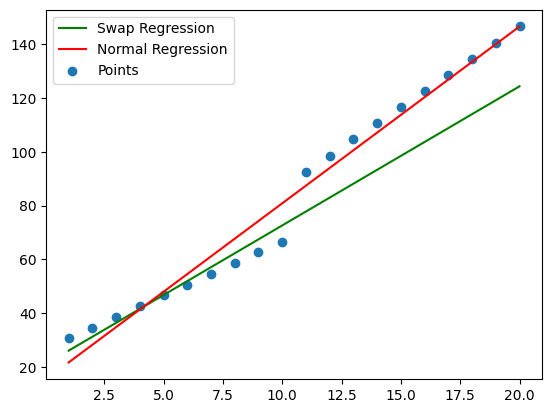

In [12]:
plotLine(SR, "g")
plotLine(R, "r")
plt.scatter(X, Y)
plt.legend(["Swap Regression", "Normal Regression", "Points"])
plt.show()

In [13]:
def loss(X, Y, A):
    Y_pred = []
    for i in range(0, len(X)):
        Y_pred.append(A[0] + A[1] * X[i])
    Y_pred = np.array(Y_pred)
    return sum((Y - Y_pred)**2)

In [14]:
print(f"Loss with Normal Regression : {loss(X, Y, R)}")
print(f"Loss with Swap Regression : {loss(X, Y, SR)}")

Loss with Normal Regression : 712.1052631578947
Loss with Swap Regression : 3615.7452172648573
